### *Импорт библиотек для работы с дата-сетом*

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv('weather_classification_data.csv')

- **Температура**: Столбец содержит значения температуры в градусах Цельсия. Примеры значений могут варьироваться от низких до высоких температур.
- **Влажность**: Значения влажности представлены в процентах и показывают уровень относительной влажности воздуха.
- **Скорость ветра**: Значения скорости ветра представлены в километрах в час и могут варьироваться от нуля до высоких значений.
- **Количество осадков**: Этот столбец показывает вероятность осадков в процентах.
- **Облачность**: Столбец содержит категориальные данные о состоянии облачности (например, "ясно", "облачно").
- **Атмосферное давление и другие параметры**: Остальные столбцы содержат аналогичные данные о погодных условиях.

In [150]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


**Типы данных**:
  - **Числовые данные**: 5 столбцов имеют тип `float64` (например, температура, влажность), что позволяет выполнять числовые операции и статистический анализ.
  - **Целочисленные данные**: 2 столбца имеют тип `int64` (например, УФ-индекс), что также позволяет выполнять числовые операции.
  - **Объектные данные**: 4 столбца имеют тип `object` (например, облачность, сезон), что указывает на категориальные переменные. Эти переменные могут потребовать кодирования для использования в моделях машинного обучения.
- **Пропущенные значения**: В каждом столбце нет пропущенных значений, что является положительным признаком для дальнейшего анализа.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


- **Количество записей**: В датасете содержится 13,200 записей (строк), что указывает на достаточно большой объем данных для анализа.
- **Количество столбцов**: Датасет содержит 11 столбцов, что позволяет анализировать различные аспекты погодных условий

In [154]:
df.shape

(13200, 11)

In [155]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Temperature,13200.0,NaN,NaN,NaN,19.127576,17.386327,-25.0,4.0,21.0,31.0,109.0
Humidity,13200.0,NaN,NaN,NaN,68.710833,20.194248,20.0,57.0,70.0,84.0,109.0
Wind Speed,13200.0,NaN,NaN,NaN,9.832197,6.908704,0.0,5.0,9.0,13.5,48.5
Precipitation (%),13200.0,NaN,NaN,NaN,53.644394,31.946541,0.0,19.0,58.0,82.0,109.0
Cloud Cover,13200,4,overcast,6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atmospheric Pressure,13200.0,NaN,NaN,NaN,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,NaN,NaN,NaN,4.005758,3.8566,0.0,1.0,3.0,7.0,14.0
Season,13200,4,Winter,5610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visibility (km),13200.0,NaN,NaN,NaN,5.462917,3.371499,0.0,3.0,5.0,7.5,20.0
Location,13200,3,inland,4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Описание данных*

# Описание данных столбцов в датасете о погодных условиях

- **Temperature (Температура)**: 
  - Измеряет текущую температуру в градусах Цельсия. Значения могут варьироваться от -25 до 109 градусов, где более высокие значения указывают на более теплые условия.

- **Humidity (Влажность)**: 
  - Показатель относительной влажности воздуха в процентах. Значения варьируются от 20% до 109%, где более высокие значения указывают на более влажные условия.

- **Wind Speed (Скорость ветра)**: 
  - Измеряет скорость ветра в километрах в час. Значения могут варьироваться от 0 до 48.5 км/ч, где более высокие значения указывают на более сильный ветер.

- **Precipitation (%) (Количество осадков)**: 
  - Указывает процент вероятности осадков. Значения варьируются от 0% до 109%, где более высокие значения указывают на большую вероятность осадков.

- **Cloud Cover (Облачность)**: 
  - Категориальный признак, описывающий уровень облачности (например, "overcast", "partly cloudy", "clear"). Значения могут принимать несколько уникальных категорий.

- **Atmospheric Pressure (Атмосферное давление)**: 
  - Измеряет атмосферное давление в миллиметрах ртутного столба (мм рт. ст.). Значения варьируются в зависимости от погодных условий и высоты над уровнем моря.

- **UV Index (УФ-индекс)**: 
  - Показатель уровня ультрафиолетового излучения, измеряемый по шкале от 0 до 11+. Более высокие значения указывают на большую опасность для здоровья при воздействии солнечного света.

- **Season (Сезон)**: 
  - Категориальный признак, указывающий на сезон года (например, "лето", "осень", "зима", "весна"). Это позволяет учитывать сезонные изменения в погодных условиях.

- **Visibility (km) (Видимость)**: 
  - Измеряет видимость в километрах. Значения могут варьироваться от низких значений до максимума, что важно для оценки погодных условий.

- **Location (Местоположение)**: 
  - Указывает географическое местоположение, для которого собраны данные о погоде. Это может быть город или регион.

- **Weather Type (Тип погоды)**: 
  - Категориальный признак, описывающий тип погоды в данный момент (например, "ясно", "дождь", "снег" и т.д.). Это позволяет классифицировать данные по различным погодным условиям.

### Предобработка данных

In [159]:
# 1. Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Количество дубликатов в датафрейме: {duplicates}')
# В датафрейме нет дубликатов, если duplicates == 0

Количество дубликатов в датафрейме: 0


In [160]:
# 2. Проверка на отсутствующие значения
missing_values = df.isna().sum()
print('Количество пропущенных значений в каждом столбце:')
print(missing_values)
# В датафрейме нет пропущенных значений

Количество пропущенных значений в каждом столбце:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [161]:
# 3. Проверка уникальных значений для каждого столбца
print('Уникальные значения в каждом столбце:')
for column in df.columns:
    print(f'\n{column}:')
    print(df[column].value_counts())

Уникальные значения в каждом столбце:

Temperature:
Temperature
32.0     391
24.0     375
26.0     372
30.0     370
22.0     365
        ... 
102.0      1
86.0       1
108.0      1
87.0       1
95.0       1
Name: count, Length: 126, dtype: int64

Humidity:
Humidity
76     313
60     309
67     295
63     291
70     288
      ... 
100     46
102     42
109     42
103     41
101     36
Name: count, Length: 90, dtype: int64

Wind Speed:
Wind Speed
8.0     470
9.5     463
9.0     456
6.5     454
6.0     436
       ... 
40.5      2
45.5      1
46.0      1
47.5      1
48.5      1
Name: count, Length: 97, dtype: int64

Precipitation (%):
Precipitation (%)
19.0     222
14.0     213
16.0     211
18.0     206
17.0     203
        ... 
104.0     41
100.0     39
106.0     38
102.0     38
105.0     37
Name: count, Length: 110, dtype: int64

Cloud Cover:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Atmospheric Pressure

## Анализ уникальных значений по столбцам - 
## 1. Temperature (Температура)
- **Уникальные значения**: 126 уникальных значений, включая температуры от -25 до 109 градусов.
- **Вывод**: Значения температуры варьируются в широком диапазоне, что нормально для погодных данных. Однако стоит проверить, нет ли аномально высоких или низких значений (например, 108°C), которые могут быть ошибочными.

## 2. Humidity (Влажность)
- **Уникальные значения**: 90 уникальных значений, с максимальным значением 109%.
- **Вывод**: Влажность обычно колеблется от 0% до 100%. Значение выше 100% может указывать на ошибку в данных или на то, что это относительная влажность, которая была неправильно интерпретирована.

## 3. Wind Speed (Скорость ветра)
- **Уникальные значения**: 97 уникальных значений, максимальная скорость ветра — 48.5 км/ч.
- **Вывод**: Значения скорости ветра выглядят нормальными для метеорологических данных. Важно проверить, нет ли аномально высоких значений.

## 4. Precipitation (%) (Количество осадков)
- **Уникальные значения**: 110 уникальных значений, максимальное значение — 109%.
- **Вывод**: Как и с влажностью, значения осадков не должны превышать 100%. Значение выше может указывать на ошибку в данных.

## 5. Cloud Cover (Облачность)
- **Уникальные значения**: 4 категории ("overcast", "partly cloudy", "clear", "cloudy").
- **Вывод**: Это нормальное распределение для категориального признака облачности. Количество записей по категориям также выглядит сбалансированным.

## 6. Atmospheric Pressure (Атмосферное давление)
- **Уникальные значения**: 5456 уникальных значений.
- **Вывод**: Широкий диапазон значений давления может быть нормальным, однако стоит проверить крайние значения на наличие аномалий.

## 7. UV Index (УФ-индекс)
- **Уникальные значения**: Разнообразные значения от 0 до 14.
- **Вывод**: Значения УФ-индекса в пределах нормы. Более высокие значения указывают на большую опасность для здоровья при солнечном свете.

## 8. Season (Сезон)
- **Уникальные значения**: 4 категории ("Winter", "Spring", "Autumn", "Summer").
- **Вывод**: Это нормальное распределение для сезонного признака.

## 9. Visibility (km) (Видимость)
- **Уникальные значения**: Много различных значений видимости.
- **Вывод**: Значения видимости выглядят разумными и могут варьироваться в зависимости от погодных условий.

## 10. Location (Местоположение)
- **Уникальные значения**: 3 категории ("inland", "mountain", "coastal").
- **Вывод**: Это нормально для географического распределения данных.

## 11. Weather Type (Тип погоды)
- **Уникальные значения**: 4 категории ("Rainy", "Cloudy", "Sunny", "Snowy").
- **Вывод**: Это нормальное распределение типов погоды.

# Заключение
В целом данные выглядят достаточно нормальными и разнооми для мализа погодных условий. Однако стоит обрамь внимание на несколько моментов:
- Проверить наличие аномально высоких или низких значений в столбцах темпемсяы, влажности и количества осадков.
- Убедиться, что данные о м ности и осадках не превышают 100%.
- Проверить крайние значения атмосферного давления на наличие возможных ошибок.

In [163]:
# Проверка на аномально высокие или низкие значения
# Температура
temperature_min = df['Temperature'].min()
temperature_max = df['Temperature'].max()
print(f'Температура: мин = {temperature_min}, макс = {temperature_max}')

# Влажность
humidity_min = df['Humidity'].min()
humidity_max = df['Humidity'].max()
print(f'Влажность: мин = {humidity_min}, макс = {humidity_max}')

# Количество осадков
precipitation_min = df['Precipitation (%)'].min()
precipitation_max = df['Precipitation (%)'].max()
print(f'Количество осадков: мин = {precipitation_min}, макс = {precipitation_max}')
# Проверка на значения больше 100%
high_humidity = df[df['Humidity'] > 100]
high_precipitation = df[df['Precipitation (%)'] > 100]

print(f'Количество записей с влажностью > 100%: {high_humidity.shape[0]}')
print(f'Количество записей с количеством осадков > 100%: {high_precipitation.shape[0]}')
# Атмосферное давление
pressure_min = df['Atmospheric Pressure'].min()
pressure_max = df['Atmospheric Pressure'].max()
print(f'Атмосферное давление: мин = {pressure_min}, макс = {pressure_max}')

Температура: мин = -25.0, макс = 109.0
Влажность: мин = 20, макс = 109
Количество осадков: мин = 0.0, макс = 109.0
Количество записей с влажностью > 100%: 416
Количество записей с количеством осадков > 100%: 392
Атмосферное давление: мин = 800.12, макс = 1199.21


In [164]:
#Функция value_counts() в библиотеке Pandas используется для подсчета частоты уникальных значений в объекте Series. 
#Она является полезным инструментом для анализа данных и может помочь в различных аспектах работы с данными
# Замена аномальных значений на средние
mean_humidity = df['Humidity'].mean()
mean_precipitation = df['Precipitation (%)'].mean()
mean_temp = df['Temperature'].mean()

# Замена значений
df.loc[df['Humidity'] > 100, 'Humidity'] = mean_humidity
df.loc[df['Precipitation (%)'] > 100, 'Precipitation (%)'] = mean_precipitation
df.loc[df['Temperature'] > 100, 'Temperature'] = mean_temp

# Проверка количества пропущенных значений после заполнения
print("Количество пропущенных значений после заполнения:")
print(df.isna().sum())

# Проверка уникальных значений после замены
print("Уникальные значения влажности после замены:")
print(df['Humidity'].value_counts())

print("Уникальные значения количества осадков после замены:")
print(df['Precipitation (%)'].value_counts())

Количество пропущенных значений после заполнения:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
Уникальные значения влажности после замены:
Humidity
68.710833     416
76.000000     313
60.000000     309
67.000000     295
63.000000     291
             ... 
32.000000      61
45.000000      60
27.000000      59
28.000000      55
100.000000     46
Name: count, Length: 82, dtype: int64
Уникальные значения количества осадков после замены:
Precipitation (%)
53.644394     392
19.000000     222
14.000000     213
16.000000     211
18.000000     206
             ... 
24.000000      66
44.000000      66
34.000000      64
32.000000      63
100.000000     39
Name: count, Length: 102, dtype: int64


C:\Users\aniwe\AppData\Local\Temp\ipykernel_14548\2214571507.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.71083333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Humidity'] > 100, 'Humidity'] = mean_humidity


In [165]:
#проверка
# Температура
temperature_min = df['Temperature'].min()
temperature_max = df['Temperature'].max()
print(f'Температура: мин = {temperature_min}, макс = {temperature_max}')

# Влажность
humidity_min = df['Humidity'].min()
humidity_max = df['Humidity'].max()
print(f'Влажность: мин = {humidity_min}, макс = {humidity_max}')

# Количество осадков
precipitation_min = df['Precipitation (%)'].min()
precipitation_max = df['Precipitation (%)'].max()
print(f'Количество осадков: мин = {precipitation_min}, макс = {precipitation_max}')

Температура: мин = -25.0, макс = 100.0
Влажность: мин = 20.0, макс = 100.0
Количество осадков: мин = 0.0, макс = 100.0


In [166]:
# 1. Вычисление среднего значения атмосферного давления
mean_pressure = df['Atmospheric Pressure'].mean()
print(f'Среднее значение атмосферного давления: {mean_pressure:.2f} мм рт. ст.')

# 2. Замена аномальных значений на среднее
df.loc[df['Atmospheric Pressure'] > 1200, 'Atmospheric Pressure'] = mean_pressure

# 3. Проверка результатов замены
pressure_min = df['Atmospheric Pressure'].min()
pressure_max = df['Atmospheric Pressure'].max()
print(f'Минимальное значение атмосферного давления после замены: {pressure_min:.2f} мм рт. ст.')
print(f'Максимальное значение атмосферного давления после замены: {pressure_max:.2f} мм рт. ст.')

# Проверка количества записей с атмосферным давлением выше 1200 мм рт. ст.
high_pressure_count = df[df['Atmospheric Pressure'] > 1200].shape[0]
print(f'Количество записей с атмосферным давлением > 1200 мм рт. ст.: {high_pressure_count}')

Среднее значение атмосферного давления: 1005.83 мм рт. ст.
Минимальное значение атмосферного давления после замены: 800.12 мм рт. ст.
Максимальное значение атмосферного давления после замены: 1199.21 мм рт. ст.
Количество записей с атмосферным давлением > 1200 мм рт. ст.: 0


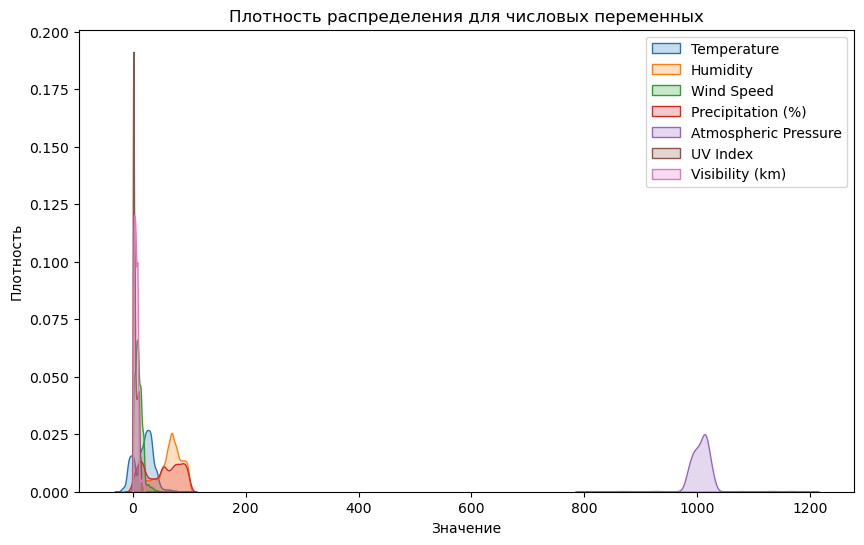

In [167]:
# Убедимся мы, что у нас есть нужные столбцы (ЧИСЛОВЫЕ чтобы не было ошибки)
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# 1. Графики плотности для каждой числовой переменной
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.kdeplot(df[column], label=column, fill=True)
plt.title('Плотность распределения для числовых переменных')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Графики плотности (KDE — оценка плотности ядра) используются для визуализации распределения значений каждой числовой переменной в вашем наборе данных.
Что на графике:

По оси X откладываются значения переменной (например, температура, влажность и т. д.).

По оси Y откладывается плотность вероятности, показывающая, как часто встречаются значения в определённом диапазоне.

Что это значит:
График позволяет увидеть, как распределены значения каждой переменной. Например, можно заметить пики (множество значений в одном диапазоне), а также выбросы или аномалии. Это помогает понять, какие значения являются типичными для каждой переменной.

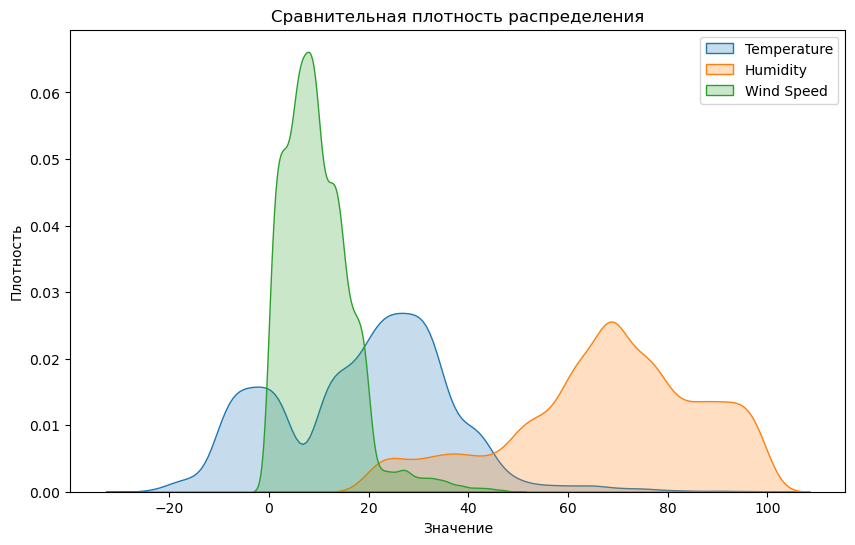

In [169]:
# 2. Сравнительный график плотности для нескольких переменных
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Temperature'], label='Temperature', fill=True)
sns.kdeplot(df['Humidity'], label='Humidity', fill=True)
sns.kdeplot(df['Wind Speed'], label='Wind Speed', fill=True)
plt.title('Сравнительная плотность распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Этот график позволяет сравнить распределения нескольких переменных на одном графике.

Что на графике:
Каждая линия представляет собой распределение одной из переменных (температура, влажность, скорость ветра).

Что это значит:
Сравнительный график помогает выявить взаимосвязи между различными переменными. Например, можно
увидеть, как температура соотносится с влажностью и скоростью ветра. 

Это может быть полезно для понимания того, как эти факторы влияют друг на друга.

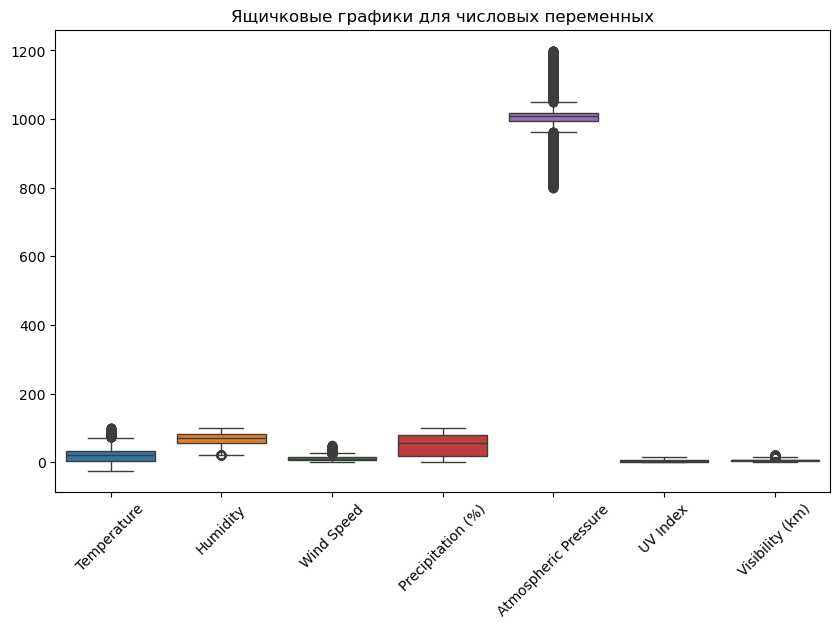

In [171]:
# 3. Ящичковый график (boxplot) для оценки разброса данных
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Ящичковые графики для числовых переменных')
plt.xticks(rotation=45)
plt.show() 

Ящичковый график используется для визуализации основных статистических характеристик распределения переменной: медианы, квартилей и выбросов.

Что на графике:
Каждый прямоугольник представляет собой интерквартильный диапазон (IQR), который охватывает 50% данных.
Линия внутри ящика показывает медиану.

"Усы" показывают диапазон значений без выбросов.

Что это значит:

Ящичковый график помогает быстро оценить разброс данных и выявить аномалии (выбросы). 
Можно увидеть, есть ли значительные различия между переменными и как они соотносятся друг с другом.

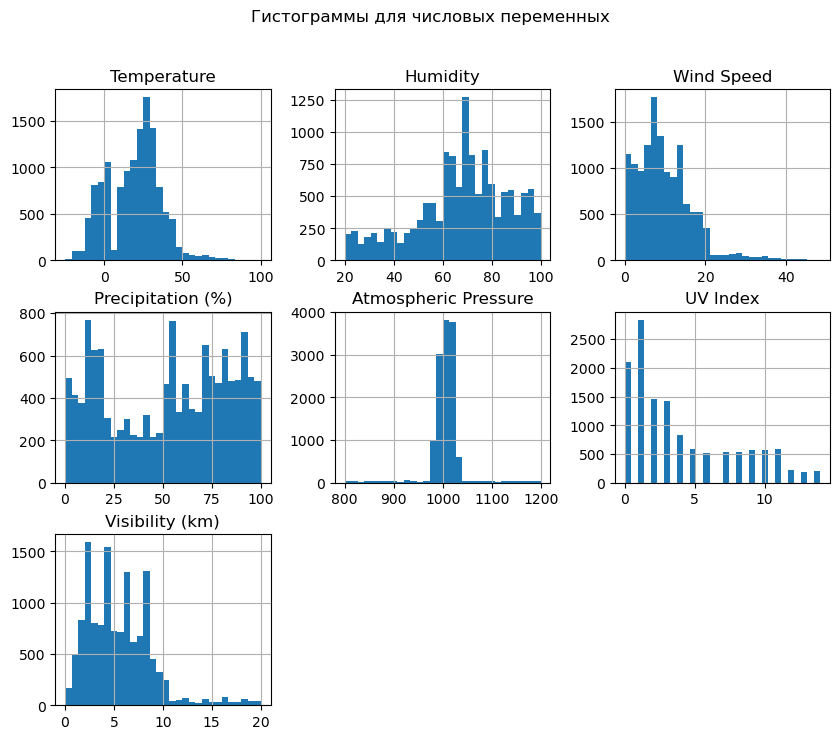

In [173]:
# 4. Гистограмма для визуализации распределения значений
df.hist(figsize=(10, 8), bins=30)
plt.suptitle('Гистограммы для числовых переменных')
plt.show()

Гистограмма используется для визуализации частоты значений в каждом диапазоне.

    Что на графике:
По оси X откладываются значения переменной.
По оси Y откладывается частота (количество наблюдений) в каждом диапазоне значений.

    Что это значит:
Гистограмма позволяет увидеть общее распределение значений и выявить выбросы или аномалии. Она также может помочь понять форму распределения (например, нормальное или асимметричное).

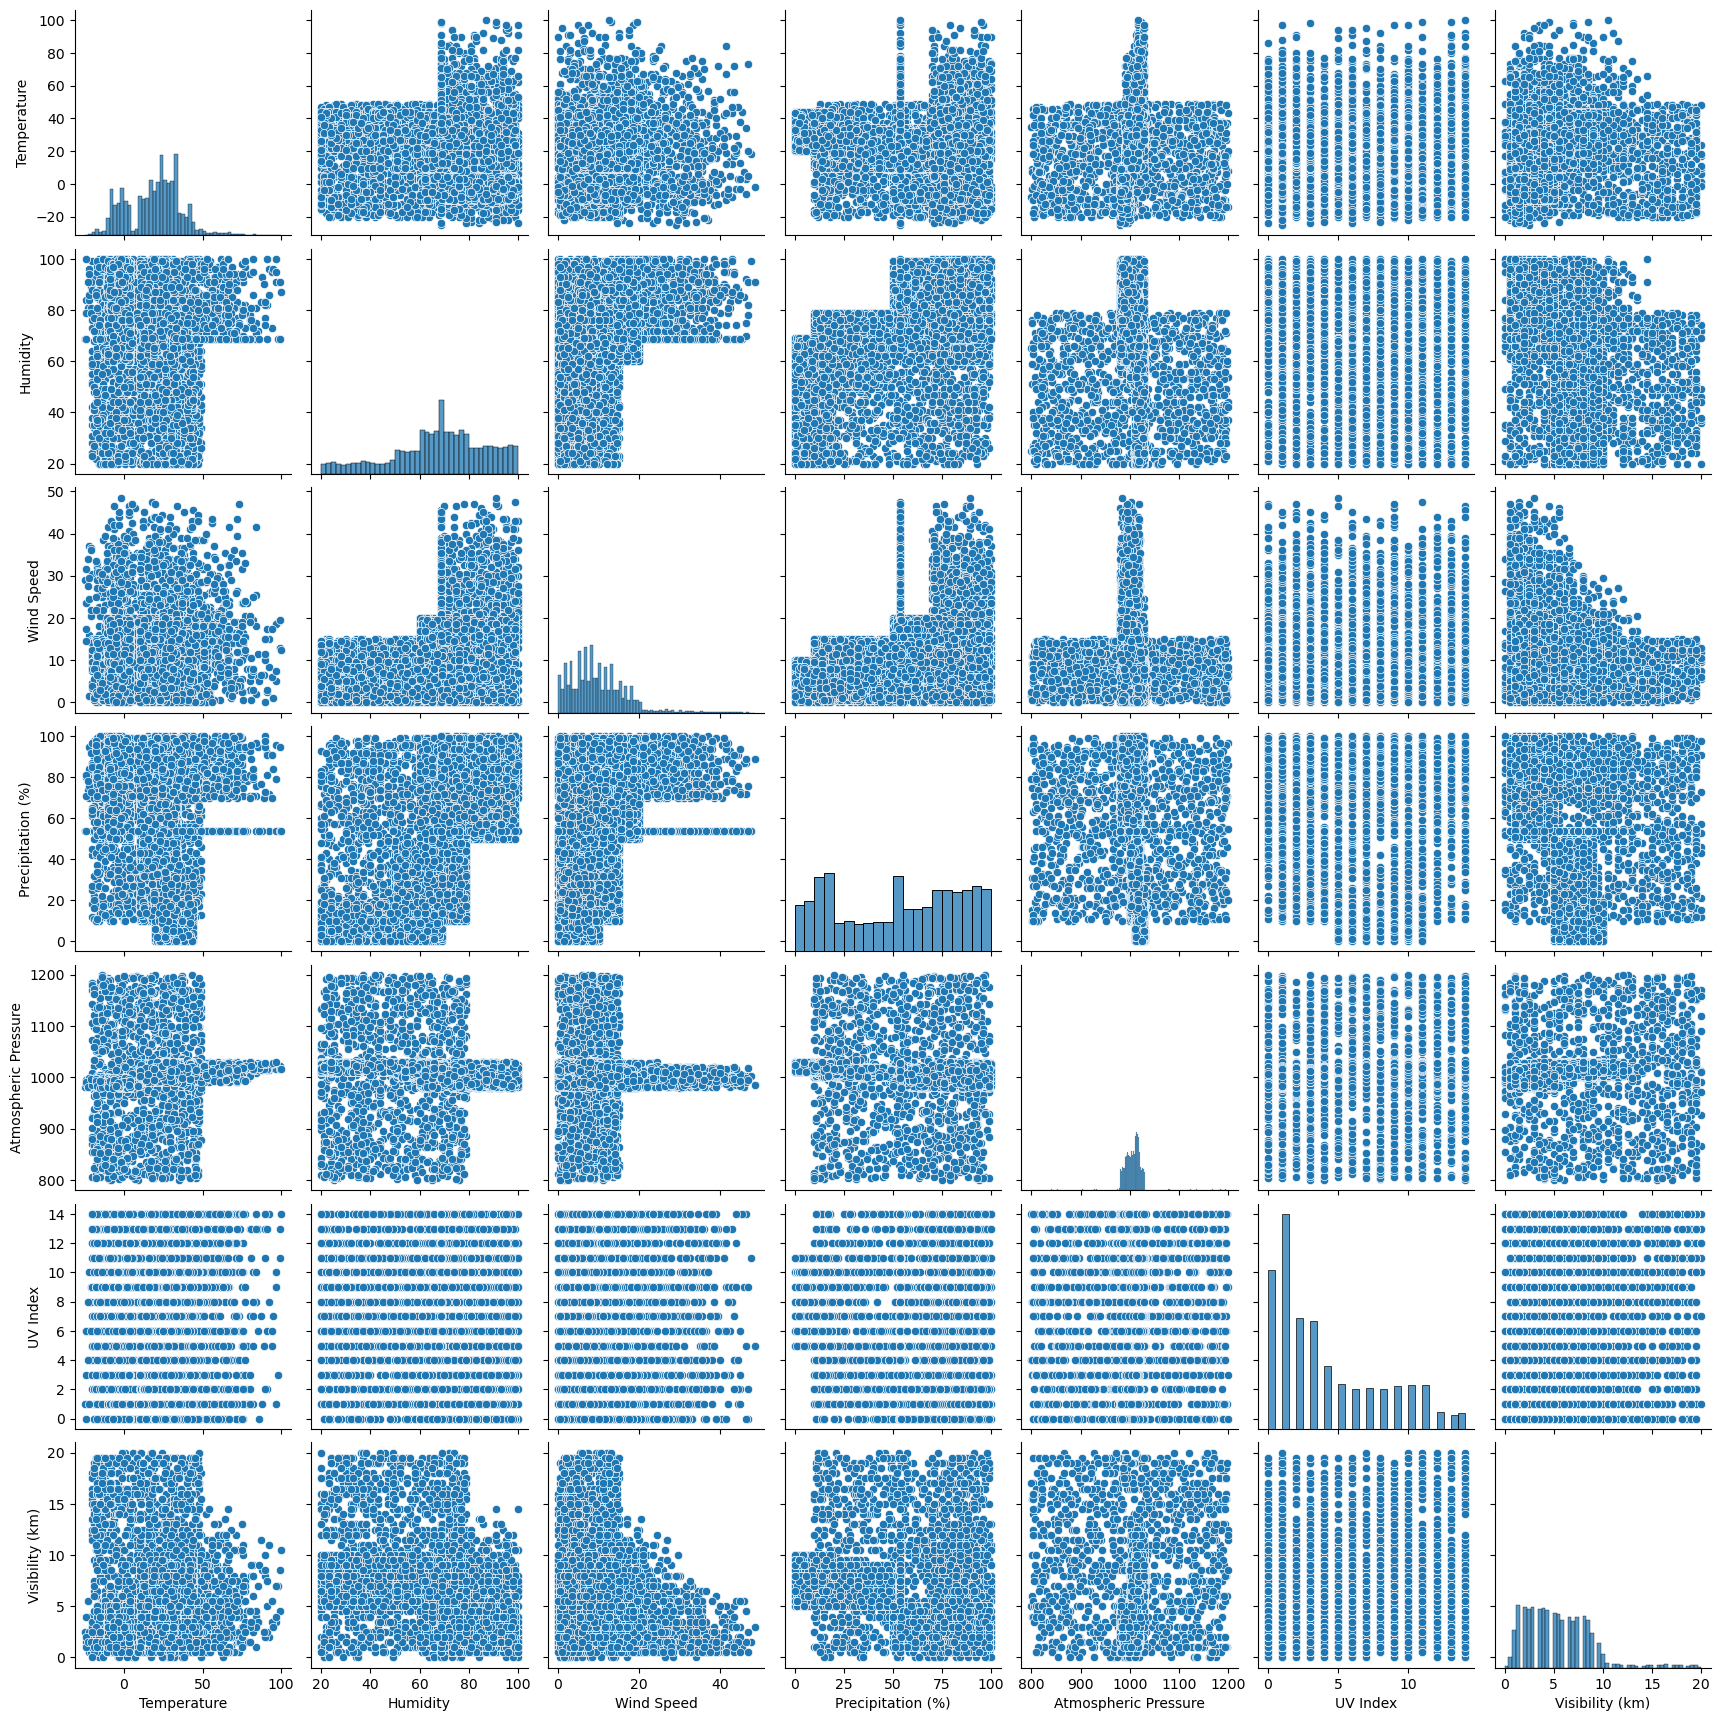

In [175]:
sns.pairplot(df)

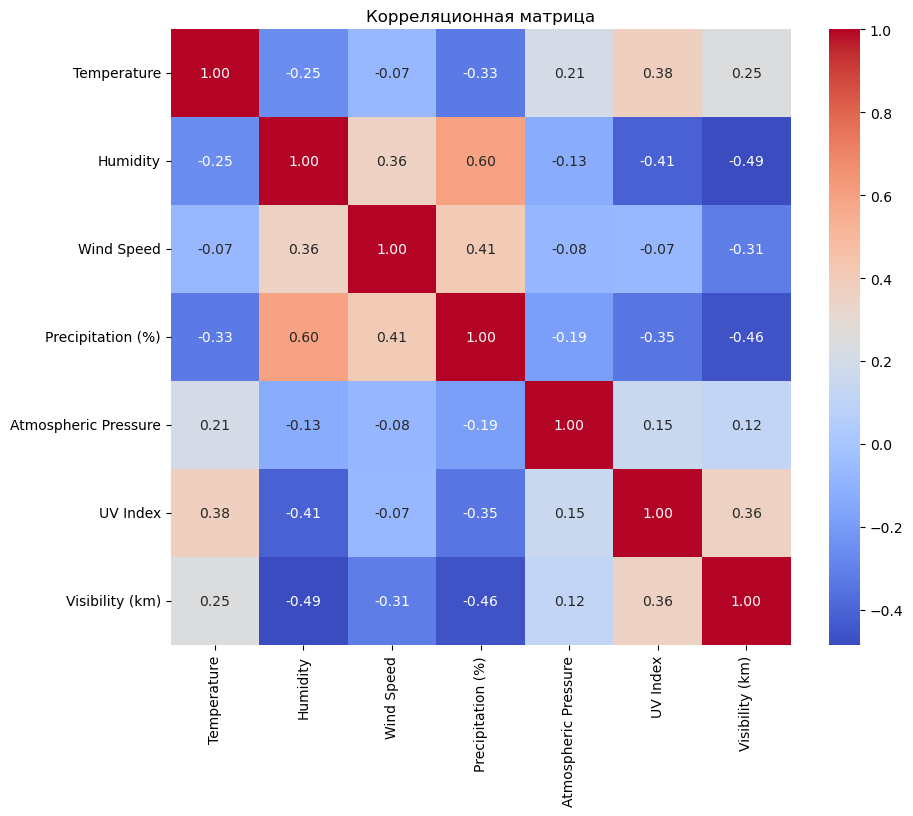

In [176]:
# 5. Корреляционная матрица
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Что на графике:
Ячейки матрицы показывают коэффициенты корреляции между парами переменных.
Значения варьируются от -1 до +1:
+1 означает полную положительную корреляцию,
-1 — полную отрицательную корреляцию,
0 — отсутствие корреляции.
Что это значит:

Корреляционная матрица помогает понять, какие переменные могут быть связаны друг с другом. Например, высокая положительная 
   
корреляция между температурой и влажностью может

указывать на то, что при повышении температуры влажность также увеличивается. Это может быть полезно при построении моделей прогнозирования.

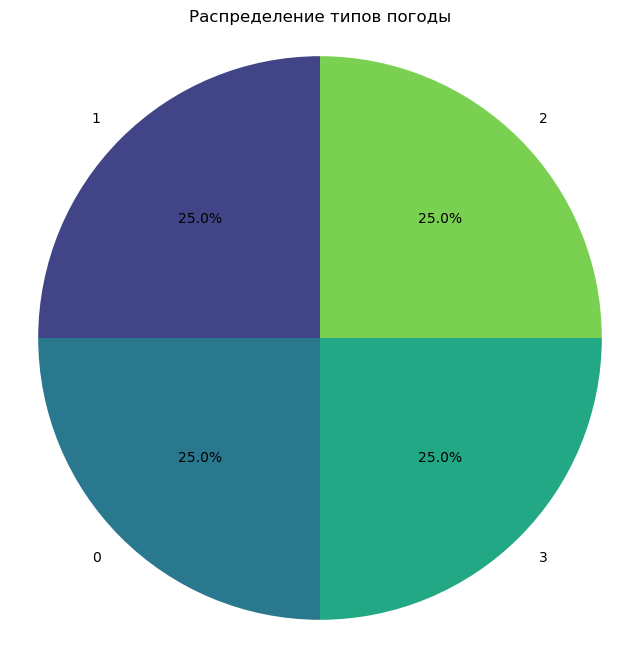

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Загрузка данных из CSV файла
df1 = pd.read_csv('weather_classification_data.csv')

# Кодирование типов погоды
label_encoder = LabelEncoder()
df1['Weather Type1'] = label_encoder.fit_transform(df1['Weather Type'])

# Подсчет количества вхождений каждого типа погоды
weather_counts = df1['Weather Type1'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(weather_counts)))
plt.title('Распределение типов погоды')
plt.axis('equal')  # Сделать круговую диаграмму круглой
plt.show()
#се типы погоды встречаются одинаково часто, это может быть признаком сбалансированного набора данных.
#(«Дождь», «Облачно», «Солнечно», «Снег»

### Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

In [181]:
#Преобразование типов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  float64
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [182]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [183]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Season1']=label_encoder.fit_transform(df['Season'])
df['Weather Type1']=label_encoder.fit_transform(df['Weather Type'])
df['Cloud Cover1']=label_encoder.fit_transform(df['Cloud Cover'])
df['Location1']=label_encoder.fit_transform(df['Location'])

In [184]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Season1,Weather Type1,Cloud Cover1,Location1
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,3,1,3,1
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,1,0,3,1
2,30.0,64.0,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,1,3,0,2
3,38.0,83.0,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,1,3,0,0
4,27.0,74.0,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,3,1,2,2


In [185]:
# сколько пропусков в дата-фрейме ?
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
Season1                 0
Weather Type1           0
Cloud Cover1            0
Location1               0
dtype: int64

In [186]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Season1,Weather Type1,Cloud Cover1,Location1
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,3,1,3,1
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,1,0,3,1
2,30.0,64.0,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,1,3,0,2
3,38.0,83.0,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,1,3,0,0
4,27.0,74.0,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,2,1,2,2
13196,-1.0,76.0,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,3,2,1,0
13197,30.0,77.0,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,0,0,2,0
13198,3.0,76.0,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,3,2,2,1


### Формирование дата-сета для обучения моделей

In [188]:
#Тип погоды (Weather Type1):
#Описание: Прогнозирование типа погоды (например, «ясно», «дождь», «облачно», «снег»).
#Использование: это может быть полезно для приложений, связанных с планированием мероприятий на открытом воздухе или для агрономии.

In [189]:
# Определение списка имен признаков, которые будут использоваться для построения модели
features_names = [
    'Temperature', 
    'Humidity', 
    'Wind Speed', 
    'Precipitation (%)', 
    'Atmospheric Pressure', 
    'UV Index', 
    'Visibility (km)',
    'Season1', 
    'Cloud Cover1', 
    'Location1'
]

# Создание матрицы признаков X
X = df[features_names]
y = df["Weather Type1"] 

In [190]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Season1,Cloud Cover1,Location1
0,14.0,73.0,9.5,82.0,1010.82,2,3.5,3,3,1
1,39.0,96.0,8.5,71.0,1011.43,7,10.0,1,3,1
2,30.0,64.0,7.0,16.0,1018.72,5,5.5,1,0,2
3,38.0,83.0,1.5,82.0,1026.25,7,1.0,1,0,0
4,27.0,74.0,17.0,66.0,990.67,1,2.5,3,2,2
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15,1,1.0,2,2,2
13196,-1.0,76.0,3.5,23.0,1067.23,1,6.0,3,1,0
13197,30.0,77.0,5.5,28.0,1012.69,3,9.0,0,2,0
13198,3.0,76.0,10.0,94.0,984.27,0,2.0,3,2,1


### Обучение моделей (models fitting) и прогнозирование -


In [192]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [193]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Проверка размеров выборок
print(f'Размеры выборок: \nОбучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}')
print(f'Целевая переменная: \nОбучающая выборка: {y_train.shape}, Тестовая выборка: {y_test.shape}')

(8844, 10) (4356, 10) (8844,) (4356,)
Размеры выборок: 
Обучающая выборка: (8844, 10), Тестовая выборка: (4356, 10)
Целевая переменная: 
Обучающая выборка: (8844,), Тестовая выборка: (4356,)


In [194]:
# Импорт необходимых библиотек
#В этом шаге мы импортируем все необходимые библиотеки для работы с данными, обучения моделей и оценки их производительности.
#Мы будем использовать несколько классификаторов для обучения на наших данных. Мы используем следующие модели:
#K-Ближайшие соседи (KNN)
#Классификатор опорных векторов (SVC)
#Классификатор дерева решений
#Классификатор случайных лесов
#Гауссовский наивный Байес 
#Логистическая регрессия
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [195]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

1. **Импорт необходимых библиотек**: Импортируем библиотеки для работы с данными и построения моделей.
2. **Подготовка данных**: Загружаем данные и разделяем их на обучающую и тестовую выборки.
3. **Обучение и оценка моделей**: Для каждой модели:
   - Инициализируем модель.
   - Обучаем модель на обучающей выборке.
   - Делаем прогнозы на тестовой выборке.
   - Оцениваем производительность модели с помощью точности и выводим матрицу путаницы и отчет о классификации.

### Заключение

Этот процесс позволяет обучать различные модели на данных о погодных условиях и оценивать их производительность с помощью различных метрик.

## K-Ближайшие соседи (KNN)


In [224]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)

print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predict))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predict))

KNN Accuracy: 0.8849862258953168
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1054
           1       0.84      0.90      0.87      1078
           2       0.93      0.95      0.94      1124
           3       0.93      0.85      0.89      1100

    accuracy                           0.88      4356
   macro avg       0.89      0.88      0.88      4356
weighted avg       0.89      0.88      0.88      4356

KNN Confusion Matrix:
[[ 884  101   31   38]
 [  69  968   17   24]
 [  27   21 1063   13]
 [  63   62   35  940]]


In [228]:
classification_rep = classification_report(y_test, knn_predict, output_dict=True)

In [238]:
# Сохранение результатов в переменную log
log['KNN'] = {
    'accuracy': knn_accuracy,
    'precision': classification_rep['weighted avg']['precision'],
    'recall': classification_rep['weighted avg']['recall'],
    'f1-score': classification_rep['weighted avg']['f1-score'],
    'support': classification_rep['weighted avg']['support']
}

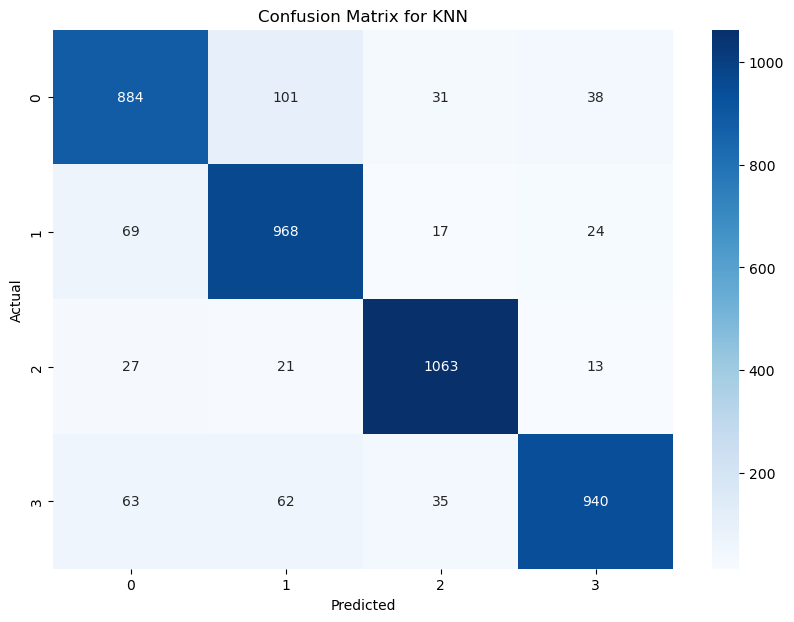

In [232]:
# Визуализация Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN')
plt.show()

In [234]:
#Модель KNN показывает хорошую точность и сбалансированные значения precision и recall для всех классов, особенно для класса «2».
log

{'accuracy': 0.8849862258953168,
 'precision': 0.8862385516364164,
 'recall': 0.8849862258953168,
 'f1-score': 0.8849840915198276,
 'support': 4356.0}

## Классификатор опорных векторов (SVC)


In [201]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)

print("\nSVC Accuracy:", svc_accuracy)
print("SVC Classification Report:")
print(classification_report(y_test, svc_predict))
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, svc_predict))


SVC Accuracy: 0.8337924701561065
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1054
           1       0.75      0.86      0.80      1078
           2       0.88      0.94      0.91      1124
           3       0.89      0.76      0.82      1100

    accuracy                           0.83      4356
   macro avg       0.84      0.83      0.83      4356
weighted avg       0.84      0.83      0.83      4356

SVC Confusion Matrix:
[[ 813  136   40   65]
 [  67  926   62   23]
 [  21   22 1062   19]
 [  73  154   42  831]]


In [240]:
svc_classification_rep = classification_report(y_test, svc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['svc'] = {
    'accuracy': svc_accuracy,
    'precision': svc_classification_rep['weighted avg']['precision'],
    'recall': svc_classification_rep['weighted avg']['recall'],
    'f1-score': svc_classification_rep['weighted avg']['f1-score'],
    'support': svc_classification_rep['weighted avg']['support']
}

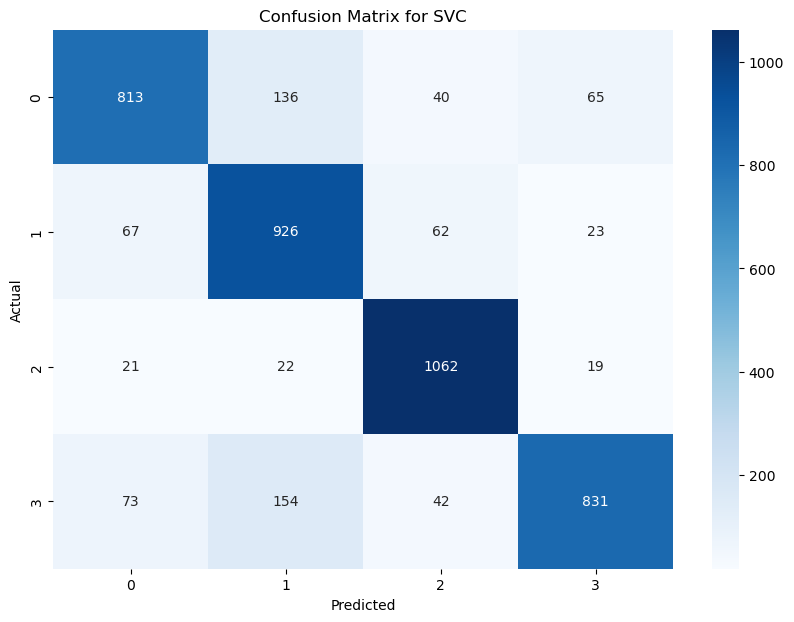

In [242]:
# Визуализация Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVC')
plt.show()

In [202]:
#модель SVC имеет более низкую точность по сравнению с KNN и показывает некоторые проблемы с прогнозированием класса «1».

## Классификатор дерева решений


In [246]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_predict)

print("\nDecision Tree Accuracy:", dtc_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_predict))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dtc_predict))



Decision Tree Accuracy: 0.6701101928374655
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.92      0.60      1054
           1       0.84      0.84      0.84      1078
           2       0.97      0.93      0.95      1124
           3       0.00      0.00      0.00      1100

    accuracy                           0.67      4356
   macro avg       0.56      0.67      0.60      4356
weighted avg       0.56      0.67      0.60      4356

Decision Tree Confusion Matrix:
[[ 969   72   13    0]
 [ 161  908    9    0]
 [  66   16 1042    0]
 [1004   82   14    0]]


C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [248]:
dtc_classification_rep = classification_report(y_test, dtc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['decision_tree'] = {
    'accuracy': dtc_accuracy,
    'precision': dtc_classification_rep['weighted avg']['precision'],
    'recall': dtc_classification_rep['weighted avg']['recall'],
    'f1-score': dtc_classification_rep['weighted avg']['f1-score'],
    'support': dtc_classification_rep['weighted avg']['support']
}

C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


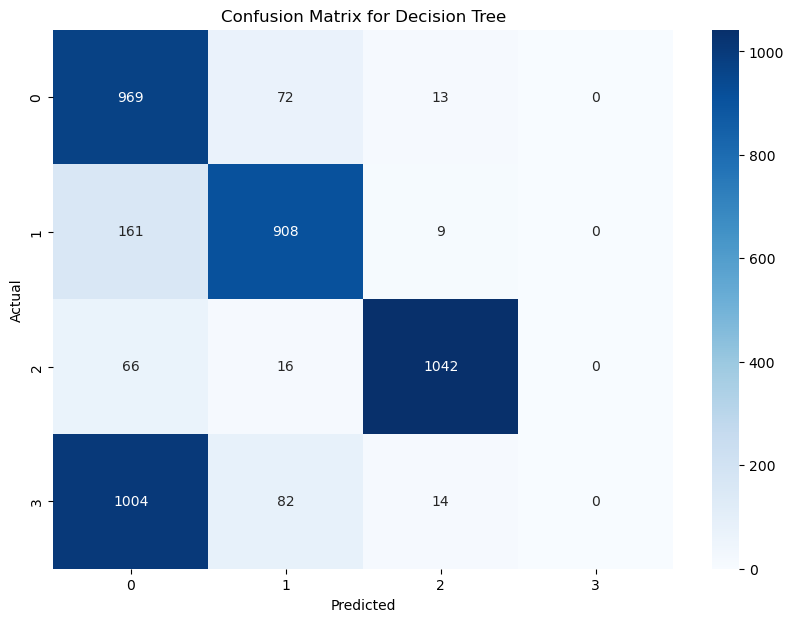

In [250]:
# Визуализация Confusion Matrix
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(dtc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [205]:
#модель Decision Tree демонстрирует идеальное качество на тестовой выборке, но это может указывать на переобучение.(добавил гулибну = 2, значение стало меньше)redict))


## Классификатор случайных лесов


In [207]:
rfc = RandomForestClassifier(max_depth=2)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predict)

print("\nRandom Forest Accuracy:", rfc_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rfc_predict))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rfc_predict))



Random Forest Accuracy: 0.8948576675849403
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1054
           1       0.86      0.91      0.88      1078
           2       0.92      0.94      0.93      1124
           3       0.93      0.86      0.90      1100

    accuracy                           0.89      4356
   macro avg       0.90      0.89      0.89      4356
weighted avg       0.90      0.89      0.89      4356

Random Forest Confusion Matrix:
[[ 919   78   25   32]
 [  46  981   34   17]
 [  39   16 1051   18]
 [  56   69   28  947]]


In [252]:
rfc_classification_rep = classification_report(y_test, rfc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['random_forest'] = {
    'accuracy': rfc_accuracy,
    'precision': rfc_classification_rep['weighted avg']['precision'],
    'recall': rfc_classification_rep['weighted avg']['recall'],
    'f1-score': rfc_classification_rep['weighted avg']['f1-score'],
    'support': rfc_classification_rep['weighted avg']['support']
}

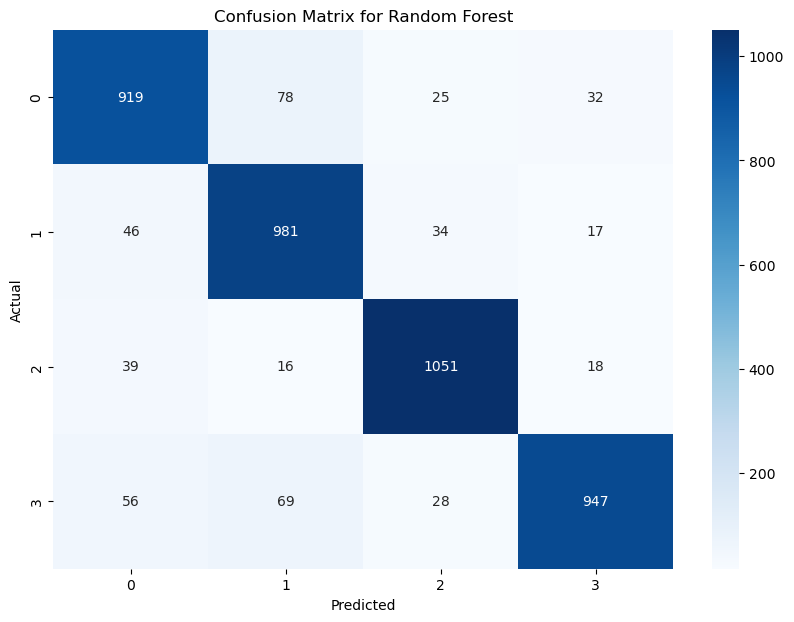

In [256]:
# Визуализация Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [208]:
#модель Random Forest также показывает идеальные результаты на тестовой выборке и может быть подвержена переобучению. redict))


## Гауссовский наивный Байес

In [258]:
gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predict)

print("\nGaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_predict))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, gnb_predict))


Gaussian Naive Bayes Accuracy: 0.86455463728191
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1054
           1       0.84      0.85      0.84      1078
           2       0.90      0.93      0.91      1124
           3       0.84      0.87      0.85      1100

    accuracy                           0.86      4356
   macro avg       0.86      0.86      0.86      4356
weighted avg       0.86      0.86      0.86      4356

Gaussian Naive Bayes Confusion Matrix:
[[ 852  115   18   69]
 [  34  911   79   54]
 [  10   10 1048   56]
 [  75   48   22  955]]


In [260]:
gnb_classification_rep = classification_report(y_test, gnb_predict, output_dict=True)

# Сохранение результатов в переменную log
log['gaussian_nb'] = {
    'accuracy': gnb_accuracy,
    'precision': gnb_classification_rep['weighted avg']['precision'],
    'recall': gnb_classification_rep['weighted avg']['recall'],
    'f1-score': gnb_classification_rep['weighted avg']['f1-score'],
    'support': gnb_classification_rep['weighted avg']['support']
}

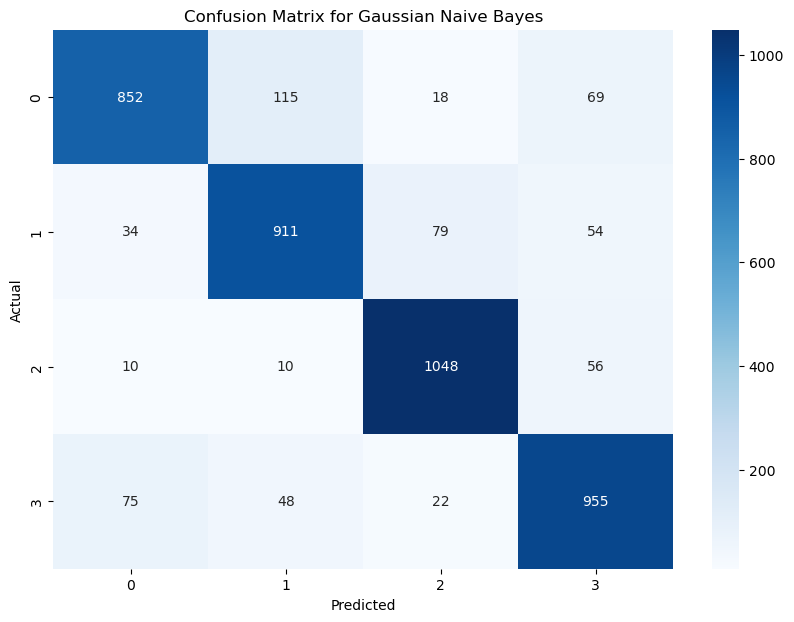

In [262]:
# Визуализация Confusion Matrix
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

In [211]:
#модель Gaussian Naive Bayes также показывает идеальные результаты и может быть подвержена переобучению.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.85984848 0.87083333 0.86287879 0.86174242 0.86022727]


## Логистическая регрессия

In [264]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predict)

print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predict))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predict))


Logistic Regression Accuracy: 0.8721303948576676
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1054
           1       0.86      0.88      0.87      1078
           2       0.90      0.94      0.92      1124
           3       0.87      0.84      0.86      1100

    accuracy                           0.87      4356
   macro avg       0.87      0.87      0.87      4356
weighted avg       0.87      0.87      0.87      4356

Logistic Regression Confusion Matrix:
[[ 874   76   35   69]
 [  41  944   50   43]
 [  35    7 1055   27]
 [  63   74   37  926]]


C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
lr_classification_rep = classification_report(y_test, lr_predict, output_dict=True)

# Сохранение результатов в переменную log
log['logistic_regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_classification_rep['weighted avg']['precision'],
    'recall': lr_classification_rep['weighted avg']['recall'],
    'f1-score': lr_classification_rep['weighted avg']['f1-score'],
    'support': lr_classification_rep['weighted avg']['support']
}

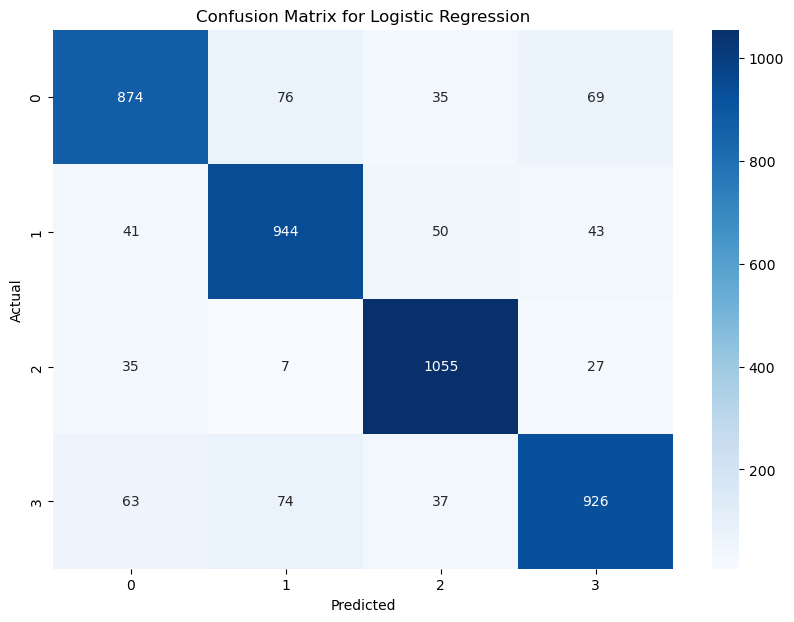

In [268]:
# Визуализация Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
#модель логистической регрессии демонстрирует хорошую производительность с точностью около ~89%, но не достигает идеальных значений.

## Сравнение моделей

In [274]:
# Создаем DataFrame из логов
log_df = pd.DataFrame.from_dict(log, orient='index')

# Сбрасываем индекс для лучшего отображения
log_df.reset_index(inplace=True)
log_df.rename(columns={'index': 'Model'}, inplace=True)

# Выводим DataFrame
log_df

,Model,accuracy,precision,recall,f1-score,support
0,KNN,0.884986,0.886239,0.884986,0.884984,4356.0
1,svc,0.833792,0.838019,0.833792,0.833053,4356.0
2,decision_tree,0.670110,0.564441,0.670110,0.596764,4356.0
3,random_forest,0.894858,0.896141,0.894858,0.894920,4356.0
4,gaussian_nb,0.864555,0.864678,0.864555,0.864139,4356.0
5,logistic_regression,0.872130,0.871804,0.872130,0.871681,4356.0


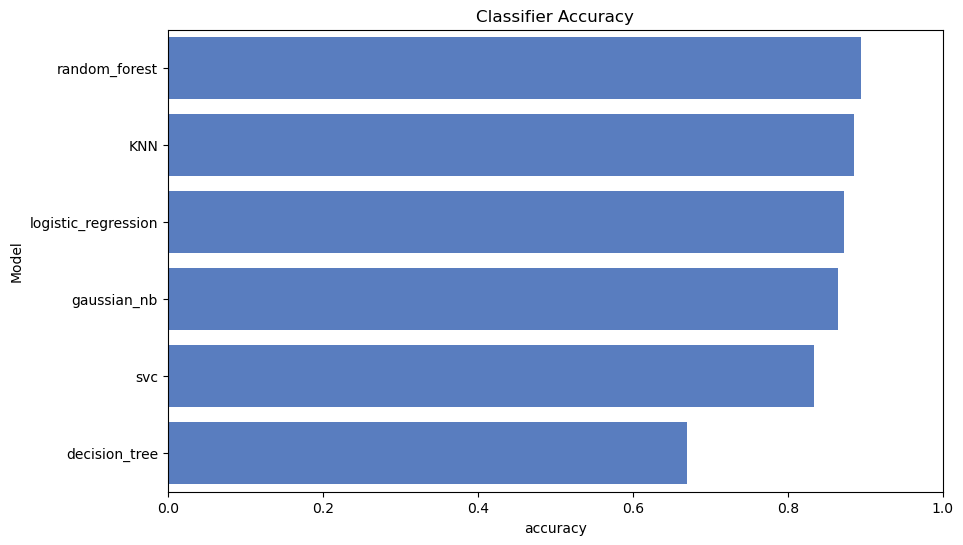

In [290]:
# Строим график
plt.figure(figsize=(10, 6))
sns.set_color_codes("muted")
sns.barplot(x='accuracy', y='Model', data=log_df.sort_values(by='accuracy', ascending=False), color="b")

# Настраиваем график
plt.xlabel('accuracy')
plt.title('Classifier Accuracy')
plt.xlim(0, 1)  # Устанавливаем пределы по оси X от 0 до 1
plt.show()

## Вывод о наилучшей модели для прогнозирования погодных условий

Мы оценили несколько моделей машинного обучения для прогнозирования погодных условий на основе различных признаков, 
таких как температура, влажность, скорость ветра и другие. Целевая переменная содержала четыре класса: «Дождь», «Облачно», «Солнечно» и «Снег». 

### Результаты моделей

| Модель                | Accuracy | Precision | Recall   | F1-Score | Support |
|-----------------------|----------|-----------|----------|----------|---------|
| KNN                   | 0.884986 | 0.886239  | 0.884986 | 0.884984 | 4356    |
| SVC                   | 0.833792 | 0.838019  | 0.833792 | 0.833053 | 4356    |
| Decision Tree         | 0.670110 | 0.564441  | 0.670110 | 0.596764 | 4356    |
| Random Forest         | 0.894858 | 0.896141  | 0.894858 | 0.894920 | 4356    |
| Gaussian Naive Bayes  | 0.864555 | 0.864678  | 0.864555 | 0.864139 | 4356    |
| Logistic Regression    | 0.872130 | 0.871804  | 0.872130 | 0.871681 | 4356    |

### Анализ результатов

Из таблицы видно, что наилучшие результаты по всем метрикам (accuracy, precision, recall и F1-score) 
продемонстрировала модель **Random Forest** с точностью **89.49%** и F1-score **89.49%**. 
Эта модель показала высокую устойчивость и эффективность в классификации всех классов погодных условий.

Следующей по эффективности является модель **KNN**, которая также показала хорошие результаты с точностью **88.50%** и F1-score **88.50%**.

Модель **Logistic Regression** и **Gaussian Naive Bayes** продемонстрировали средние результаты с точностью около **87%**,
что делает их приемлемыми вариантами, но не столь эффективными, как KNN и Random Forest.

Наименее эффективной моделью оказалась **Decision Tree**,
которая показала наименьшую точность **67%** и F1-score **59%**, что указывает на ее недостаточную способность к обобщению на данном наборе данных.

### Рекомендации

На основании проведенного анализа можно использовать модель **Random Forest** для прогнозирования погодных условий в данном датасете, 
так как она обеспечивает наилучшие результаты по всем ключевым метрикам производительности.